In [ ]:
!sudo apt-get update
!sudo apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python

import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.


Saving pngtree-barcode-black-and-white-box-icon-png-image_4520080.png to pngtree-barcode-black-and-white-box-icon-png-image_4520080 (5).png
Barcode Detected: 054041238851111111


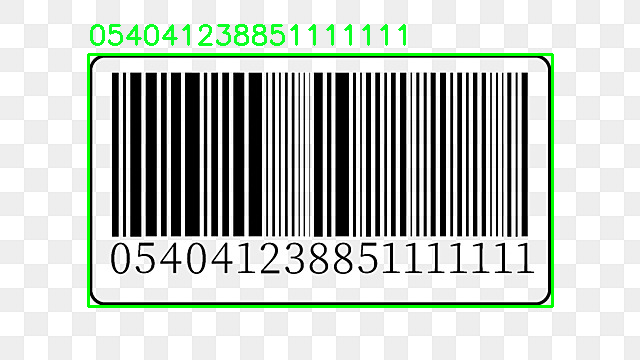

In [ ]:
uploaded = files.upload()

for fn in uploaded:
    img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), cv2.IMREAD_COLOR)

    if img is None:
        print("Error: Gambar tidak ada.")

    else:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        edges = cv2.Canny(gray, 50, 150, apertureSize=3)

        contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            roi = gray[y:y+h, x:x+w]

            barcode_text = pytesseract.image_to_string(roi, config='--psm 6')


            if len(barcode_text.strip()) > 5:
                cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cv2.putText(img, barcode_text.strip(), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
                print(f"Barcode Detected: {barcode_text.strip()}")
            else: print("None")
            break


        cv2_imshow(img)